It’s a dark night in the middle of winter as you make your way through another of Emily Dickinson’s poems. As you grapple with questions of immortality and death, you notice the word choice in each poem you read. With each passing poem, you discover for yourself which words are common throughout her work, and which indicate more unique meaning in individual poems.

You might not even realize, but you are building a language model in your head similar to term frequency-inverse document frequency, commonly known as tf-idf. Tf-idf is another powerful tool in your NLP toolkit that has a variety of use cases included:

- ranking results in a search engine
- text summarization
- building smarter chatbots

![TFIDF](https://codecademy-content.s3.amazonaws.com/programs/chatbots/tfidf/tfidf-transformer.gif "TFIDF")

The gif on the right showcases an example of applying tf-idf to a set of documents. The output of applying tf-idf is the table shown, also known as a term-document matrix. You can think of a term-document matrix like a matrix of bag-of-word vectors.

Each column of the table represents a unique document (in this case, an individual sentence). Each row represents a unique word token. The value in each cell represents the tf-idf score for a word token in that particular document.

### 1 - What is Tf-idf?

Term frequency-inverse document frequency is a numerical statistic used to indicate how important a word is to each document in a collection of documents, or a corpus.

When applying tf-idf to a corpus, each word is given a tf-idf score for each document, representing the relevance of that word to the particular document. A higher tf-idf score indicates a term is more important to the corresponding document.

Tf-idf has many similarities with the bag-of-words language model, which if you recall is concerned with word count — how many times each word appears in a document.

While tf-idf can be used in any situation bag-of-words can be used, there is a key difference in how it is calculated.

Tf-idf relies on two different metrics in order to come up with an overall score:

- term frequency, or how often a word appears in a document. This is the same as bag-of-words’ word count.
- inverse document frequency, which is a measure of how often a word appears in the overall corpus. By penalizing the score of words that appear throughout a corpus, tf-idf can give better insight into how important a word is to a particular document of a corpus.

If a term appears more frequently in a document, the tf-idf score for that term-document pair will go up.

If a term appears in multiple documents, the tf-idf score for the term across all documents will go down.

In [1]:
# Define a Function for Preprocessing the Text

import nltk, re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

stop_words = stopwords.words('english')
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized

In [8]:
# Creating TF-IDF Sample

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# sample documents
document_1 = "This is a sample sentence!"
document_2 = "This is my second sentence."
document_3 = "Is this my third sentence?"

# corpus of documents
corpus = [document_1, document_2, document_3]

# preprocess documents
processed_corpus = [preprocess_text(doc) for doc in corpus] 

# initialize and fit TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
tf_idf_scores = vectorizer.fit_transform(processed_corpus)

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()
corpus_index = [n for n in processed_corpus]

# create pandas DataFrame with tf-idf scores
df_tf_idf = pd.DataFrame(tf_idf_scores.T.todense(), index=feature_names, columns=corpus_index)
df_tf_idf

# Each row of the table represents a term, and each column of the table represents a document. The value in each cell indicates 
# the tf-idf score for each term-document pair.

,this be a sample sentence,this be my second sentence,be this my third sentence
be,1.000000,1.000000,1.000000
my,0.000000,1.287682,1.287682
sample,1.693147,0.000000,0.000000
second,0.000000,1.693147,0.000000
sentence,1.000000,1.000000,1.000000
third,0.000000,0.000000,1.693147
this,1.000000,1.000000,1.000000


### 2 - Breaking It Down Part I: Term Frequency

The first component of tf-idf is term frequency, or how often a word appears in a document within the corpus.

The value for the term frequency is the same as if applying the bag-of-words language model to a document. If you have previously studied bag-of-words, this will all be familiar! If not, have no fear.

Term frequency indicates how often each word appears in the document. The intuition for including term frequency in the tf-idf calculation is that the more frequently a word appears in a single document, the more important that term is to the document.

Consider the stanza from Emily Dickinson’s poem I’m Nobody! Who are you? below:

stanza = '''I'm nobody! Who are you?<br>
Are you nobody, too?<br>
Then there's a pair of us — don't tell!<br>
They'd banish us, you know.'''<br>

The term frequency for “you” is 3, “nobody” is 2, “are” is 2, “us” is 2, and the rest of the terms have a frequency of 1. We can get a general sense of what this stanza is about by the most frequently used words.

Term frequency can be calculated in Python using scikit-learn’s CountVectorizer, as shown below:

vectorizer = CountVectorizer()<br>
term_frequencies = vectorizer.fit_transform([stanza])<br>

A CountVectorizer object is initialized<br>

The CountVectorizer object is fit (trained) and transformed (applied) on the corpus of data, returning the term frequencies for each term-document pair

In [11]:
# Get the Term Frequency

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

poem = '''
Success is counted sweetest
By those who ne'er succeed.
To comprehend a nectar
Requires sorest need.

Not one of all the purple host
Who took the flag to-day
Can tell the definition,
So clear, of victory,

As he, defeated, dying,
On whose forbidden ear
The distant strains of triumph
Break, agonized and clear!'''

# define clear_count:
clear_count = 0

# preprocess text
processed_poem = preprocess_text(poem)

# initialize and fit CountVectorizer
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform([processed_poem])

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()

# create pandas DataFrame with term frequencies
try:
    df_term_frequencies = pd.DataFrame(term_frequencies.T.todense(), index=feature_names, columns=['Term Frequency'])
    display(df_term_frequencies)
except:
    pass

,Term Frequency
agonize,1
all,1
and,1
be,1
break,1
by,1
can,1
clear,2
comprehend,1
count,1


### 3 - Breaking It Down Part II: Inverse Document Frequency

The inverse document frequency component of the tf-idf score penalizes terms that appear more frequently across a corpus. The intuition is that words that appear more frequently in the corpus give less insight into the topic or meaning of an individual document, and should thus be deprioritized.

For example, terms like “the” or “go” are used all over the place, so in a bag-of-words model, they would be given priority even though they don’t provide much meaning; tf-idf would deprioritize these sorts of common words.

We can calculate the inverse document frequency for some term t across a corpus using the below equation. Don’t be scared if you aren’t a math person!

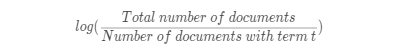

The important take away from the equation is that as the number of documents with the term t increases, the inverse document frequency decreases (due to the nature of the log function). The more frequently a term appears across the corpus, the less important it becomes to an individual document.

Inverse document frequency can be calculated on a group of documents using scikit-learn’s TfidfTransformer:

transformer = TfidfTransformer(norm=None)<br>
transformer.fit(term_frequencies)<br>
inverse_doc_frequency = transformer.idf_<br>

a TfidfTransformer object is initialized. Don’t worry about the norm=None keyword argument for now, we will dig into this in the next exercise
the TfidfTransformer is fit (trained) on a term-document matrix of term frequencies
the .idf_ attribute of the TfidfTransformer stores the inverse document frequencies of the terms as a NumPy array

In [13]:
# Define Term Frequency

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from poems import poems

# preprocess text
processed_poems = [preprocess_text(poem) for poem in poems]

# initialize and fit CountVectorizer
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform(processed_poems)

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()

# get corpus index
corpus_index = [f"Poem {i+1}" for i in range(len(poems))]

# create pandas DataFrame with term frequencies
df_term_frequencies = pd.DataFrame(term_frequencies.T.todense(), index=feature_names, columns=corpus_index)

In [15]:
# Work on Inverse Document Frequency

import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

# display term-document matrix of term frequencies
display(df_term_frequencies)

# initialize and fit TfidfTransformer
transformer = TfidfTransformer(norm=None)
transformer.fit(term_frequencies)
idf_values = transformer.idf_

# create pandas DataFrame with inverse document frequencies
try:
    df_idf = pd.DataFrame(idf_values, index = feature_names, columns=['Inverse Document Frequency'])
    display(df_idf)
except:
    pass

,Poem 1,Poem 2,Poem 3,Poem 4,Poem 5,Poem 6
abash,0,0,0,0,1,0
across,0,0,0,1,0,0
admire,0,0,1,0,0,0
again,0,0,0,1,0,0
agonize,1,0,0,0,0,0
...,...,...,...,...,...,...
word,0,0,0,0,1,0
wreck,0,0,0,1,0,0
yet,0,0,0,0,1,0
you,0,0,3,0,0,0


,Inverse Document Frequency
abash,2.252763
across,2.252763
admire,2.252763
again,2.252763
agonize,2.252763
...,...
word,2.252763
wreck,2.252763
yet,2.252763
you,2.252763


### 4 - Putting It All Together: Tf-idf

Now that we understand how term frequency and inverse document frequency are calculated, let’s put it all together to calculate tf-idf!

Tf-idf scores are calculated on a term-document basis. That means there is a tf-idf score for each word, for each document. The tf-idf score for some term t in a document d in some corpus is calculated as follows:

tfidf(t,d) = tf(t,d)*idf(t,corpus)
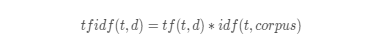

tf(t,d) is the term frequency of term t in document d <br>
idf(t,corpus) is the inverse document frequency of a term t across corpus<br>

We can easily calculate the tf-idf values for each term-document pair in our corpus using scikit-learn’s TfidfVectorizer:

vectorizer = TfidfVectorizer(norm=None)<br>
tfidf_vectorizer = vectorizer.fit_transform(corpus)<br>

a TfidfVectorizer object is initialized. The norm=None keyword argument prevents scikit-learn from modifying the multiplication of term frequency and inverse document frequency

the TfidfVectorizer object is fit and transformed on the corpus of data, returning the tf-idf scores for each term-document pair

In [20]:
# Combine TF - IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from poems import poems

# preprocess documents
processed_poems = [preprocess_text(poem) for poem in poems]

# initialize and fit TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None)
tfidf_scores = vectorizer.fit_transform(processed_poems)

# get vocabulary of terms - get Unique terms in corpus
feature_names = vectorizer.get_feature_names()
print(feature_names)

# get corpus index
corpus_index = [f"Poem {i+1}" for i in range(len(poems))]

# create pandas DataFrame with tf-idf scores
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=corpus_index)
    display(df_tf_idf)
except:
    pass

['abash', 'across', 'admire', 'again', 'agonize', 'ah', 'all', 'an', 'and', 'any', 'aristocracy', 'ask', 'at', 'banish', 'be', 'beat', 'bee', 'begin', 'bell', 'bird', 'bog', 'boot', 'box', 'brain', 'break', 'but', 'by', 'can', 'chart', 'chillest', 'clear', 'clover', 'compass', 'comprehend', 'concern', 'could', 'count', 'creak', 'crumb', 'day', 'defeat', 'definition', 'die', 'distant', 'do', 'don', 'dreary', 'drum', 'ear', 'eden', 'er', 'extremity', 'feather', 'felt', 'flag', 'forbid', 'fro', 'frog', 'funeral', 'futile', 'gale', 'go', 'he', 'hear', 'heart', 'heaven', 'here', 'him', 'honey', 'hope', 'host', 'how', 'in', 'it', 'keep', 'know', 'land', 'lead', 'lift', 'like', 'little', 'livelong', 'luxury', 'many', 'me', 'might', 'mind', 'moor', 'mourner', 'must', 'my', 'name', 'ne', 'nectar', 'need', 'never', 'night', 'nobody', 'not', 'numb', 'of', 'on', 'one', 'our', 'pair', 'pedigree', 'perch', 'port', 'public', 'purple', 'race', 'require', 'rowing', 'same', 'sea', 'seat', 'seem', 'sense

,Poem 1,Poem 2,Poem 3,Poem 4,Poem 5,Poem 6
abash,0.000000,0.0,0.000000,0.000000,2.252763,0.0
across,0.000000,0.0,0.000000,2.252763,0.000000,0.0
admire,0.000000,0.0,2.252763,0.000000,0.000000,0.0
again,0.000000,0.0,0.000000,2.252763,0.000000,0.0
agonize,2.252763,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
word,0.000000,0.0,0.000000,0.000000,2.252763,0.0
wreck,0.000000,0.0,0.000000,2.252763,0.000000,0.0
yet,0.000000,0.0,0.000000,0.000000,2.252763,0.0
you,0.000000,0.0,6.758289,0.000000,0.000000,0.0


### 5 - Converting Bag-of-Words to Tf-idf

In addition to directly calculating the tf-idf scores for a set of terms across a corpus, you can also convert a bag-of-words model you have already created into tf-idf scores.

Scikit-learn’s TfidfTransformer is up to the task of converting your bag-of-words model to tf-idf. You begin by initializing a TfidfTransformer object.

tf_idf_transformer = TfidfTransformer(norm=False)

Given a bag-of-words matrix count_matrix, you can now multiply the term frequencies by their inverse document frequency to get the tf-idf scores as follows:

tf_idf_scores = tfidf_transformer.fit_transform(count_matrix)

This is very similar to how we calculated inverse document frequency, except this time we are fitting and transforming the TfidfTransformer to the term frequencies/bag-of-words vectors rather than just fitting the TfidfTransformer to them.

In [25]:
# Define Term Frequency

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from poems import poems

# preprocess text
processed_poems = [preprocess_text(poem) for poem in poems]

# initialize and fit CountVectorizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_poems)

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()

# get corpus index
corpus_index = [f"Poem {i+1}" for i in range(len(poems))]

# create pandas DataFrame with term frequencies
df_bag_of_words = pd.DataFrame(bow_matrix.T.todense(), index=feature_names, columns=corpus_index)

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

# display term-document matrix of term frequencies (bag-of-words)
display(df_bag_of_words)

# initialize and fit TfidfTransformer, transform bag-of-words matrix
transformer = TfidfTransformer(norm=None)
tfidf_scores = transformer.fit_transform(bow_matrix)

# create pandas DataFrame with tf-idf scores
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index = feature_names, columns=corpus_index)
    display(df_tf_idf)
except:
    pass

,Poem 1,Poem 2,Poem 3,Poem 4,Poem 5,Poem 6
abash,0,0,0,0,1,0
across,0,0,0,1,0,0
admire,0,0,1,0,0,0
again,0,0,0,1,0,0
agonize,1,0,0,0,0,0
...,...,...,...,...,...,...
word,0,0,0,0,1,0
wreck,0,0,0,1,0,0
yet,0,0,0,0,1,0
you,0,0,3,0,0,0


,Poem 1,Poem 2,Poem 3,Poem 4,Poem 5,Poem 6
abash,0.000000,0.0,0.000000,0.000000,2.252763,0.0
across,0.000000,0.0,0.000000,2.252763,0.000000,0.0
admire,0.000000,0.0,2.252763,0.000000,0.000000,0.0
again,0.000000,0.0,0.000000,2.252763,0.000000,0.0
agonize,2.252763,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
word,0.000000,0.0,0.000000,0.000000,2.252763,0.0
wreck,0.000000,0.0,0.000000,2.252763,0.000000,0.0
yet,0.000000,0.0,0.000000,0.000000,2.252763,0.0
you,0.000000,0.0,6.758289,0.000000,0.000000,0.0


In [29]:
# Review 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from raven import the_raven_stanzas

# view first stanza
print(the_raven_stanzas[0])

# preprocess documents
processed_stanzas = [preprocess_text(stanza) for stanza in the_raven_stanzas]

# initialize and fit TfidfVectorizer
vectorizer = TfidfVectorizer(norm= None)
tfidf_scores = vectorizer.fit_transform(processed_stanzas)

# get vocabulary of terms
feature_names = vectorizer.get_feature_names()

# get stanza index
stanza_index = [f"Stanza {i+1}" for i in range(len(the_raven_stanzas))]

# create pandas DataFrame with tf-idf scores
try:
    df_tf_idf = pd.DataFrame(tfidf_scores.T.todense(), index=feature_names, columns=stanza_index)
    print(df_tf_idf)
except:
    pass


Once upon a midnight dreary, while I pondered, weak and weary,
 Over many a quaint and curious volume of forgotten lore,
 While I nodded, nearly napping, suddenly there came a tapping,
 As of some one gently rapping, rapping at my chamber door
        Stanza 1  Stanza 2  Stanza 3  Stanza 4  Stanza 5   Stanza 6  Stanza 7  \
above        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
adore        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
again        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
agree        0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
ah           0.0       0.0  3.079442       0.0       0.0   0.000000       0.0   
...          ...       ...       ...       ...       ...        ...       ...   
wretch       0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
yet          0.0       0.0  0.000000       0.0       0.0   0.000000       0.0   
yore         0.0       0.0

### Review

“Hope is the thing with feathers
That perches in the soul
And sings the tune without the words
And never stops at all.”

So goes Emily Dickinson’s poem Hope is the thing with feathers. And just as Emily proclaims, your hope and perseverance have taken you to the end of this lesson!

Let’s recount all you have learned:

- Term frequency-inverse document frequency, known as tf-idf, is a numerical statistic used to indicate how important a word is to each document in a collection of documents
- tf-idf consists of two components, term frequency and inverse document frequency
- term frequency is how often a word appears in a document. This is the same as bag-of-words’ word count
- inverse document frequency is a measure of how often a word appears across all documents of a corpus
- tf-idf is calculated as the term frequency multiplied by the inverse document frequency
- term frequency, inverse document frequency, and tf-idf can be calculated in scikit-learn using the CountVectorizer, TfidfTransformer, and TfidfVectorizer objects, respectively

Quiz:

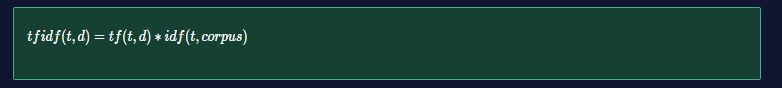
Tf-idf is calculated as the product of term frequency, tf(t,d), and inverse document frequency, idf(t,corpus).

As the number of documents with the term t increases, the inverse document frequency decreases due to the nature of the log function.

While tf-idf is useful in creating chatbots, it’s not so powerful that it can create human-like artificial intelligence.

Term frequency is calculated the same way as the bag-of-words language model.

Tf-idf is calculated as the product of term frequency and inverse document frequency.

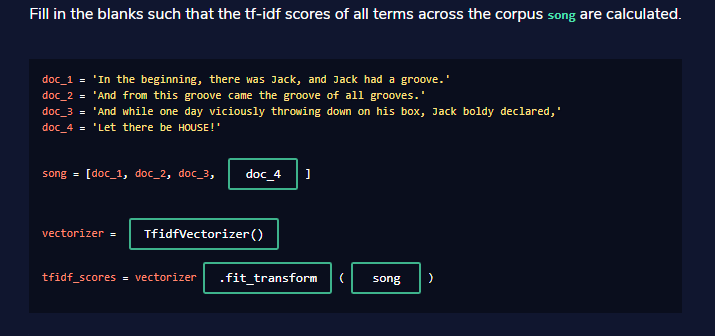